# **Grammy Awards Dataset - Exploratory Data Analysis (EDA)**

## Introduction

This project aims to analyze a dataset of Grammy Awards nominations and winners, containing detailed information about nominees, artists, categories, and awards spanning from 1968 to 2019. The dataset includes attributes such as the year of the award, category, nominee, artist, and whether the nominee won the award, among other metadata.

The analysis focuses on identifying patterns and trends in the data to answer key questions such as:  
   - Which artists have won the most Grammy awards overall and in a single year?  
   - How has the number of awards per category evolved over the years?  
   - What is the distribution of winners by category?  
   - How have awards varied across different musical genres over time?  

## Dataset

### About Dataset
- **Overview**:  
  A Grammy Award (stylized as GRAMMY, originally called Gramophone Award), or Grammy, is an award presented by The Recording Academy to recognize achievements in the music industry. The trophy depicts a gilded gramophone. The annual presentation ceremony features performances by prominent artists and highlights awards with broad public interest. The Grammys are the second of the Big Three major music awards held annually (between the American Music Awards in the Fall and the Billboard Music Awards in the Summer). This dataset covers Grammy Awards data from 1968 to 2019.

- **Source**:  
  The data were extracted from the Awards' list page and IMDb.

- **Rows**: Approximately 4,810 records (based on typical Grammy datasets).  
- **Columns**:  
  | Column        | Description                                      |  
  |---------------|--------------------------------------------------|  
  | `year`        | Year of the award (1968-2019)                    |  
  | `title`       | Annual award title                               |  
  | `published_at`| Date of initial publication                      |  
  | `updated_at`  | Date of last update                              |  
  | `category`    | Award category (e.g., Record of the Year)        |  
  | `nominee`     | Nominee name                                     |  
  | `artist`      | Artist name                                      |  
  | `workers`     | People who worked on the nominee                 |  
  | `img`         | URL of the image                                 |  
  | `winner`      | Boolean (True if the nominee won the category)   |

### Criteria for Analysis
- A record is considered a **winner** if `winner == True`.  
- Analysis will focus on trends over time (1968-2019) and across categories, artists, and genres (if derivable).

## Exploratory Data Analysis (EDA)

### Tools Used
- **Python**: For data processing and analysis.  
- **Polars**: A fast and efficient data manipulation library.  
- **Tableau**: For creating interactive visualizations.  
- **Matplotlib**: For creating static visualizations.  
- **Seaborn**: For creating informative and attractive statistical graphics.  
- **Pandas**: For data manipulation and analysis.  
- **psycopg2**: For connecting the transformed data to PostgreSQL.  
- **PostgreSQL**: As the chosen database.  
- **scikit-learn (sklearn)**: For PCA, clustering (K-Means, Isolation Forest), imputation (KNNImputer), and simple predictive models (LogisticRegression).  
- **statsmodels**: For advanced time series decomposition and statistical tests.  
- **scipy**: For statistical tests like t-tests.  
- **scikit-manifold (sklearn.manifold)**: For dimensionality reduction techniques like t-SNE (visualizing clusters).  
- **missingno**: For visualizing missing data patterns (optional but useful).  
- **plotly**: For interactive visualizations in your dashboard (optional, if allowed).  

- **Jupyter Notebook**: For executing and documenting the code.

### EDA Plan
## **1. Dataset Description**
### **General Structure**
### **Preview of Data**
### **Initial Quality Check**

## **2. Descriptive Statistics**
### **Numerical Variables**
### **Categorical Variables**
### **Summary of Anomalies**

## **3. Distribution Analysis**
### **Temporal Trends**
### **Category Distribution**
### **Artist Recognition**
### **Industry Trends**

## **4. Data Cleaning**
### **Handling Missing Values**
### **Duplicate Removal**
### **Standardization and Normalization**

## **5. Relationships Between Variables**
### **Trend Analysis**
### **Artist Success Over Time**
### **Category Evolution**
### **Genre Trends**

## **7. Data Visualization Strategy**
### **Key Charts**
### **Dashboard Insights**

## **8. Conclusion**

## **1. Dataset Description**

#### Overview

The dataset contains Grammy Awards nomination data in tabular format, where each row represents a **single nomination** in a specific category for a given year. The data spans from **1968 to 2019**, and includes metadata such as the award year, category, nominee name, artist, and a boolean flag indicating whether the nominee won.

The structure is suitable for tracking trends over time, analyzing award frequency by artist or category, and identifying winning patterns. Additional fields like `workers` and `img` provide contextual metadata, while `published_at` and `updated_at` indicate record creation and update times.

In [12]:
import polars as pl 
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv("../data/raw/the_grammy_awards.csv")
df.head(10)


year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
i64,str,str,str,str,str,str,str,str,bool
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Bad Guy""","""Billie Eilish""","""Finneas O'Connell, producer; R…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Hey, Ma""","""Bon Iver""","""BJ Burton, Brad Cook, Chris Me…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""7 rings""","""Ariana Grande""","""Charles Anderson, Tommy Brown,…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Hard Place""","""H.E.R.""","""Rodney “Darkchild” Jerkins, pr…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Talk""","""Khalid""","""Disclosure & Denis Kosiak, pro…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Old Town Road""","""Lil Nas X Featuring Billy Ray …","""Andrew ""VoxGod"" Bolooki, Jocel…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Truth Hurts""","""Lizzo""","""Ricky Reed & Tele, producers; …","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Record Of The Year""","""Sunflower""","""Post Malone & Swae Lee""","""Louis Bell & Carter Lang, prod…","""https://www.grammy.com/sites/c…",true
2019,"""62nd Annual GRAMMY Awards (20…","""2020-05-19T05:10:28-07:00""","""2020-05-19T05:10:28-07:00""","""Album Of The Year""","""When We All Fall Asleep, Where…","""Billie Eilish""","""Finneas O'Connell, producer; R…","""https://www.grammy.com/sites/c…",true


#### Key Observations

- The dataset has **10 columns**, covering nomination metadata such as `year`, `category`, `nominee`, `artist`, and `winner`.
- The `winner` column is a **boolean field** (`True`/`False`) that identifies whether a nominee won in their category.
- The column `workers` contains long text strings detailing contributors (e.g., producers, engineers) and may require parsing for individual attribution analysis.
- The `img` field contains URLs, which are not essential for statistical analysis but can support visual dashboards.
- Time-related fields `published_at` and `updated_at` are ISO-formatted datetime strings, more relevant for data freshness tracking than content analysis.
- Categories such as "Record Of The Year" appear multiple times per year, as each nominee within a category is a separate row.

## **1. Dataset Description**

#### Overview

The dataset contains Grammy Awards nomination records from **1968 to 2019**, with a total of **4,810 rows** and **10 columns**. Each row represents a single nominee in a specific category and year, including whether they won the award (`winner = True`). The structure includes metadata such as the nominee name, artist, contributors, and publication timestamps.

In [13]:
missing_values = df.null_count()
print("Missing values:\n", missing_values)

duplicates = df.is_duplicated().sum()
print("Number of duplicated rows:", duplicates)

unique_counts = df.n_unique()
print("Unique values per column:\n", unique_counts)


Missing values:
 shape: (1, 10)
┌──────┬───────┬──────────────┬────────────┬───┬────────┬─────────┬──────┬────────┐
│ year ┆ title ┆ published_at ┆ updated_at ┆ … ┆ artist ┆ workers ┆ img  ┆ winner │
│ ---  ┆ ---   ┆ ---          ┆ ---        ┆   ┆ ---    ┆ ---     ┆ ---  ┆ ---    │
│ u32  ┆ u32   ┆ u32          ┆ u32        ┆   ┆ u32    ┆ u32     ┆ u32  ┆ u32    │
╞══════╪═══════╪══════════════╪════════════╪═══╪════════╪═════════╪══════╪════════╡
│ 0    ┆ 0     ┆ 0            ┆ 0          ┆ … ┆ 1840   ┆ 2190    ┆ 1367 ┆ 0      │
└──────┴───────┴──────────────┴────────────┴───┴────────┴─────────┴──────┴────────┘
Number of duplicated rows: 0
Unique values per column:
 4810


#### Key Observations

- No missing values in structural fields; `artist`, `workers`, and `img` contain missing values in ~38%, ~45%, and ~28% of records respectively.
- No duplicate rows detected — all entries are unique.
- All columns have a high number of unique values, confirming dataset variability and integrity.

## **2. Descriptive Statistics**

#### Unique Values in Key Categorical Columns

#### Overview

This section explores the variability of key categorical fields (`category`, `nominee`, `artist`, `workers`, and `img`) by counting their unique values. This helps identify how diverse and granular each dimension is, particularly for analyses involving aggregation or grouping.

In [14]:
unique_values = {
    "category": df["category"].n_unique(),
    "nominee": df["nominee"].n_unique(),
    "artist": df["artist"].n_unique(),
    "workers": df["workers"].n_unique(),
    "img": df["img"].n_unique()
}

for col, count in unique_values.items():
    print(f"{col}: {count} unique values")

category: 638 unique values
nominee: 4132 unique values
artist: 1659 unique values
workers: 2367 unique values
img: 1464 unique values


#### Key Observations

- **638 unique categories**, reflecting a wide range of award types and subgenres.
- **4,132 unique nominees**, indicating recurring works or re-nominations across years.
- **1,659 unique artists**, showing moderate artist repetition and collaborative patterns.
- **2,367 unique workers**, highlighting diversity in production and technical contributions.
- **1,464 unique image URLs**, with partial visual metadata coverage.

#### Frequency Analysis of Categories, Nominees, Artists, and Contributors

#### Overview

This section focuses on identifying the most frequently occurring elements in four key categorical fields: `category`, `nominee`, `artist`, and `workers`. It includes both the count of unique values and the top 10 most common entries in each group. For contributors in the `workers` column, individual names are extracted from comma-separated lists.

These frequency counts help reveal which awards are most represented, which artists or works appear most frequently, and which producers or engineers contribute most consistently across Grammy nominations.

In [15]:
unique_categories = df["category"].n_unique()
unique_nominees = df["nominee"].n_unique()
unique_artists = df["artist"].n_unique()
unique_workers = df["workers"].drop_nulls().str.split(", ").explode().n_unique()

most_common_categories = df["category"].value_counts().sort("count", descending=True).head(10)

most_common_nominees = df["nominee"].value_counts().sort("count", descending=True).head(10)

most_common_artists = df["artist"].value_counts().sort("count", descending=True).head(10)

print("Top 10 Categories:\n", most_common_categories)
print("Top 10 Nominees:\n", most_common_nominees)
print("Top 10 Artists:\n", most_common_artists)

most_common_workers = df["workers"].drop_nulls().str.split(", ").explode().value_counts().sort("count", descending=True).head(10)

print("Top 10 Workers:\n", most_common_workers)

Top 10 Categories:
 shape: (10, 2)
┌────────────────────────────────┬───────┐
│ category                       ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Song Of The Year               ┆ 70    │
│ Record Of The Year             ┆ 69    │
│ Album Of The Year              ┆ 66    │
│ Best Opera Recording           ┆ 64    │
│ Best Album Notes               ┆ 63    │
│ Best Country Song              ┆ 55    │
│ Best Instrumental Composition  ┆ 55    │
│ Best New Artist                ┆ 51    │
│ Best Historical Album          ┆ 44    │
│ Best Chamber Music Performance ┆ 43    │
└────────────────────────────────┴───────┘
Top 10 Nominees:
 shape: (10, 2)
┌─────────────────────────────┬───────┐
│ nominee                     ┆ count │
│ ---                         ┆ ---   │
│ str                         ┆ u32   │
╞═════════════════════════════╪═══════╡
│ Robert Woods                ┆ 7     │
│ Br

#### Key Observations

- **638 unique categories** are present, with some recurring across decades (e.g., "Album Of The Year", "Best New Artist").
- The most frequent **categories** include high-profile and general awards.
- **Nominees** total 4,132 unique entries, with several works appearing repeatedly across years or categories.
- **Artists** show moderate concentration; a few names dominate the top 10 by frequency of appearance.
- The `workers` field includes over **2,000 unique contributors**, with top entries reflecting highly active producers or engineers.

### #Listing All Unique Award Categories

#### Overview

This section retrieves and prints the complete list of unique values in the `category` column. This is essential for understanding the full scope of Grammy Award types represented in the dataset, from general to genre-specific to technical distinctions.

By identifying all unique award categories, we gain insight into the diversity and evolution of Grammy classifications across time.

In [16]:
unique_categories = df["category"].unique().to_list()

for category in unique_categories:
    print(category)


Best Jazz Performance - Small Group Or Soloist With Small Group
Best Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)
Best Mexican-American Performance
Best Hard Rock/Metal Performance Vocal Or Instrumental
Best Pop Vocal Performance, Female
Best Rhythm & Blues Vocal Performance, Male
Best Rock Album
Best Improvised Jazz Solo
Best Banda Album
Best Traditional R&B Performance
Best Arrangement, Instruments and Vocals
Best Native American Music Album
Best Spoken Word Album
Best Song Written For A Motion Picture Or For Television
Best R&B Performance
Best Contemporary Blues Recording
Best Pop Solo Performance
Best Opera Recording
Best New Country Song
Best Contemporary Vocal Performance, Female
Best Classical Choral Performance (Other Than Opera)
Best Arrangement For Voices (Duo, Group Or Chorus)
Best Rhythm & Blues Solo Vocal Performance, Male Or Female
Best Album Cover - Photography
Best Engineered Recording
Best Contemporary Soul Gospel Album
Best New Artist Of

#### Word Frequency Analysis in Award Categories

#### Overview

To better understand the nature and structure of the Grammy categories, this section performs a frequency analysis of the words used across all entries in the `category` column. This helps uncover dominant themes such as "performance", "album", or "vocal", and provides early insights into how the dataset should be interpreted or joined with other sources.

This step is particularly useful when planning to **merge with track-based datasets**, since the Grammy data is not centered around individual songs but rather around albums, recordings, or performances. Word frequency helps inform cleaning or transformation steps in downstream pipelines (e.g., in Airflow DAGs).

In [17]:
category_list = df.select("category").to_series().to_list()
all_text = " ".join([str(cat) for cat in category_list if cat is not None])
words = all_text.lower().replace(",", "").replace(".", "").split()
word_df = pl.DataFrame({"word": words})
word_counts = word_df.group_by("word").count().sort("count", descending=True).head(10)
print(word_counts)

shape: (10, 2)
┌──────────────┬───────┐
│ word         ┆ count │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ best         ┆ 4484  │
│ performance  ┆ 1682  │
│ album        ┆ 1610  │
│ vocal        ┆ 744   │
│ or           ┆ 626   │
│ instrumental ┆ 571   │
│ classical    ┆ 434   │
│ recording    ┆ 424   │
│ of           ┆ 365   │
│ country      ┆ 352   │
└──────────────┴───────┘


C:\Users\57302\AppData\Local\Temp\ipykernel_4376\3951124916.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  word_counts = word_df.group_by("word").count().sort("count", descending=True).head(10)


#### Key Observations

- The word **"best"** appears in **4,484 categories**, reflecting the award structure's formal naming convention.
- The most frequent terms indicate a focus on **performance**, **albums**, **vocal**, and **instrumental** work, rather than specific tracks.
- Terms like **"classical"**, **"country"**, and **"recording"** highlight genre or format-specific awards.
- The analysis confirms that most categories are **not tied directly to individual songs**, which will influence how this dataset is later merged or aligned with track-based sources (e.g., Spotify or Billboard).

#### Top Artists and Contributors by Award Count

#### Overview
This section identifies the most awarded artists and most frequently credited contributors in the dataset by analyzing the `artist` and `workers` fields

In [18]:
# Get the top 10 most awarded artists
top_artists = df["artist"].value_counts().sort("count", descending=True).head(10)

# Display results
print(top_artists)

# Split "workers" column by commas, explode the list, and count occurrences
workers_split = df["workers"].drop_nulls().str.split(", ").explode()

# Get the top 10 most frequent individuals in the "workers" field
top_workers = workers_split.value_counts().sort("count", descending=True).head(10)

# Display results
print(top_workers)


shape: (10, 2)
┌───────────────────┬───────┐
│ artist            ┆ count │
│ ---               ┆ ---   │
│ str               ┆ u32   │
╞═══════════════════╪═══════╡
│ null              ┆ 1840  │
│ (Various Artists) ┆ 66    │
│ U2                ┆ 18    │
│ Aretha Franklin   ┆ 16    │
│ Stevie Wonder     ┆ 13    │
│ Bruce Springsteen ┆ 13    │
│ Beyoncé           ┆ 13    │
│ Ella Fitzgerald   ┆ 13    │
│ Dixie Chicks      ┆ 12    │
│ Ray Charles       ┆ 12    │
└───────────────────┴───────┘
shape: (10, 2)
┌──────────────────┬───────┐
│ workers          ┆ count │
│ ---              ┆ ---   │
│ str              ┆ u32   │
╞══════════════════╪═══════╡
│ engineers/mixers ┆ 303   │
│ engineer/mixer   ┆ 253   │
│ producer         ┆ 151   │
│ producers        ┆ 89    │
│ engineer         ┆ 56    │
│ soloist          ┆ 51    │
│ artist           ┆ 48    │
│ composer         ┆ 44    │
│ video producers  ┆ 38    │
│ video producer   ┆ 37    │
└──────────────────┴───────┘


#### Observations
- The most awarded artist is **U2** with **18 nominations**, followed by **Aretha Franklin** and **Beyoncé** with **16 and 13** respectively.
- The `artist` field contains **1,840 null values**, often in ensemble or classical categories.
- Among contributors, general roles like **engineers/mixers** and **producers** dominate the top, rather than individual names—suggesting role tags were used more than actual contributor names.


## **3. Data Cleaning**

#### Date and Time Normalization

#### Overview
In this step, the original timestamp columns `published_at` and `updated_at` were converted to Bogotá local time and split into separate `date` and `time` fields. This normalization improves readability and enables precise temporal analysis (e.g., time-of-day trends, publishing delays, or temporal grouping).

In [19]:
df = df.with_columns([
    pl.col("published_at").str.to_datetime().dt.convert_time_zone("America/Bogota"),
    pl.col("updated_at").str.to_datetime().dt.convert_time_zone("America/Bogota")
])

df = df.with_columns([
    pl.col("published_at").dt.date().alias("published_date"),
    pl.col("published_at").dt.time().alias("published_time"),
    pl.col("updated_at").dt.date().alias("updated_date"),
    pl.col("updated_at").dt.time().alias("updated_time")
])

df = df.drop(["published_at", "updated_at"])
df.head()

year,title,category,nominee,artist,workers,img,winner,published_date,published_time,updated_date,updated_time
i64,str,str,str,str,str,str,bool,date,time,date,time
2019,"""62nd Annual GRAMMY Awards (20…","""Record Of The Year""","""Bad Guy""","""Billie Eilish""","""Finneas O'Connell, producer; R…","""https://www.grammy.com/sites/c…",true,2020-05-19,07:10:28,2020-05-19,07:10:28
2019,"""62nd Annual GRAMMY Awards (20…","""Record Of The Year""","""Hey, Ma""","""Bon Iver""","""BJ Burton, Brad Cook, Chris Me…","""https://www.grammy.com/sites/c…",true,2020-05-19,07:10:28,2020-05-19,07:10:28
2019,"""62nd Annual GRAMMY Awards (20…","""Record Of The Year""","""7 rings""","""Ariana Grande""","""Charles Anderson, Tommy Brown,…","""https://www.grammy.com/sites/c…",true,2020-05-19,07:10:28,2020-05-19,07:10:28
2019,"""62nd Annual GRAMMY Awards (20…","""Record Of The Year""","""Hard Place""","""H.E.R.""","""Rodney “Darkchild” Jerkins, pr…","""https://www.grammy.com/sites/c…",true,2020-05-19,07:10:28,2020-05-19,07:10:28
2019,"""62nd Annual GRAMMY Awards (20…","""Record Of The Year""","""Talk""","""Khalid""","""Disclosure & Denis Kosiak, pro…","""https://www.grammy.com/sites/c…",true,2020-05-19,07:10:28,2020-05-19,07:10:28


#### Observations
- The dataset now includes **four new fields**: `published_date`, `published_time`, `updated_date`, and `updated_time`, all extracted from their original ISO-format strings.
- Original columns `published_at` and `updated_at` were successfully removed after decomposition.
- This transformation is essential for future use cases involving **temporal filtering, visualization, or aggregation** by day or hour.

## **3. Distribution Analysis**

#### Most Awarded Categories

#### Overview
This section highlights the Grammy categories with the highest number of awarded entries. It uses the `winner` flag to count how many times each category produced a winning record, giving insight into the most consistently recognized areas of the music industry.

In [20]:
winner_values = df["winner"].value_counts().sort("count", descending=True).head(10)
print("Winners values:\n", most_common_categories)

Winners values:
 shape: (10, 2)
┌────────────────────────────────┬───────┐
│ category                       ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Song Of The Year               ┆ 70    │
│ Record Of The Year             ┆ 69    │
│ Album Of The Year              ┆ 66    │
│ Best Opera Recording           ┆ 64    │
│ Best Album Notes               ┆ 63    │
│ Best Country Song              ┆ 55    │
│ Best Instrumental Composition  ┆ 55    │
│ Best New Artist                ┆ 51    │
│ Best Historical Album          ┆ 44    │
│ Best Chamber Music Performance ┆ 43    │
└────────────────────────────────┴───────┘


#### Observations
- The top 3 most awarded categories are **Song Of The Year (70)**, **Record Of The Year (69)**, and **Album Of The Year (66)**, all part of the Grammys' General Field.
- Several classical and technical categories also appear frequently, such as **Best Opera Recording (64)** and **Best Album Notes (63)**.
- The prominence of **Best New Artist (51)** shows continued interest in highlighting emerging talent across decades.

####  **Top Categories, Nominees, Artists & Workers**

#### Overview  
This section highlights the most frequent categories, nominees, awarded artists, and contributors (workers) in the GRAMMY dataset. It also explores name characteristics, such as string length, to understand naming patterns across fields.

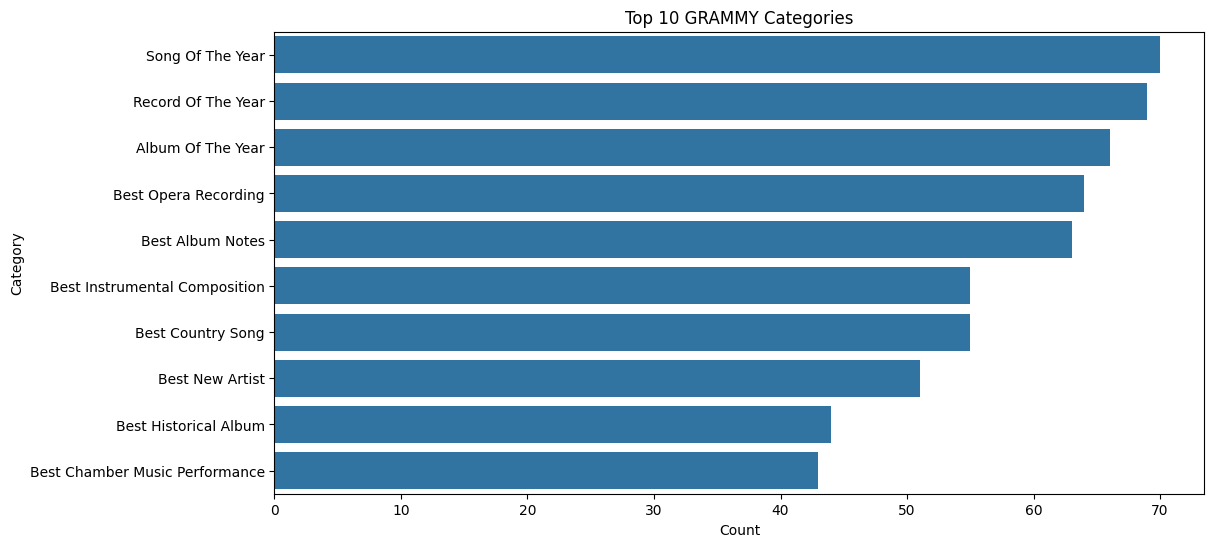

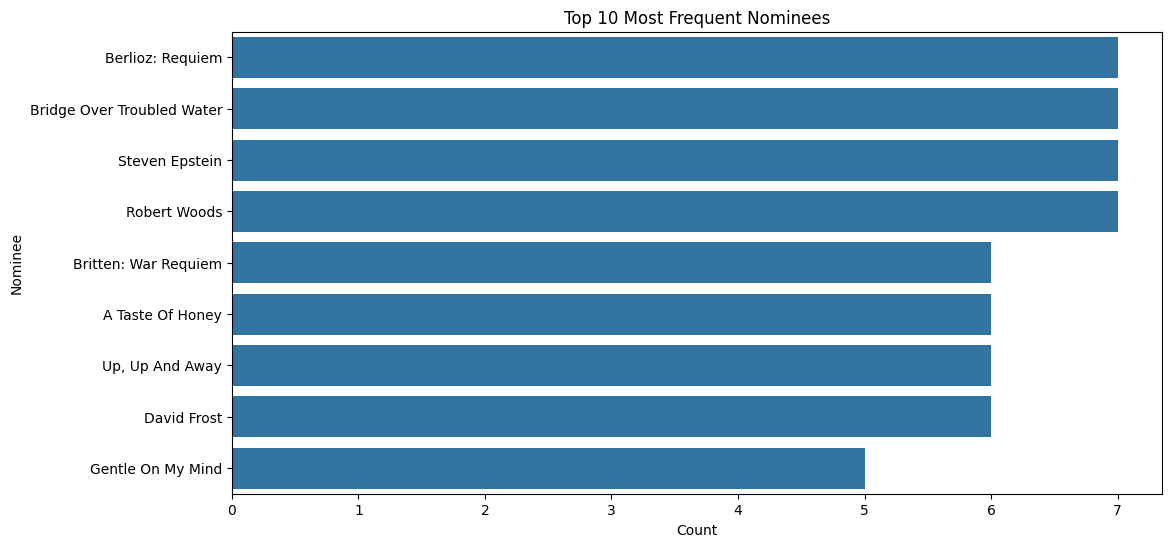

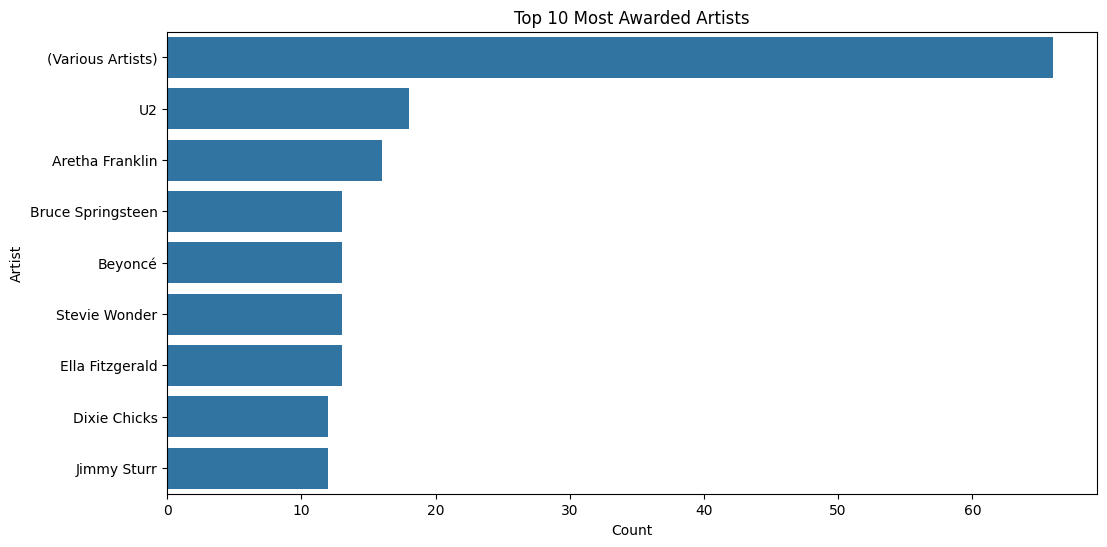

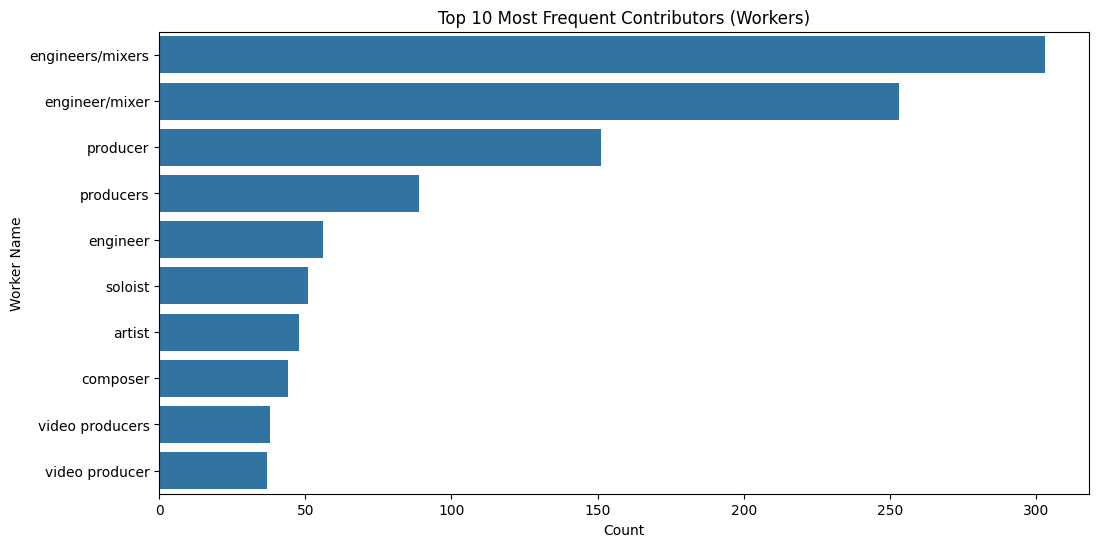

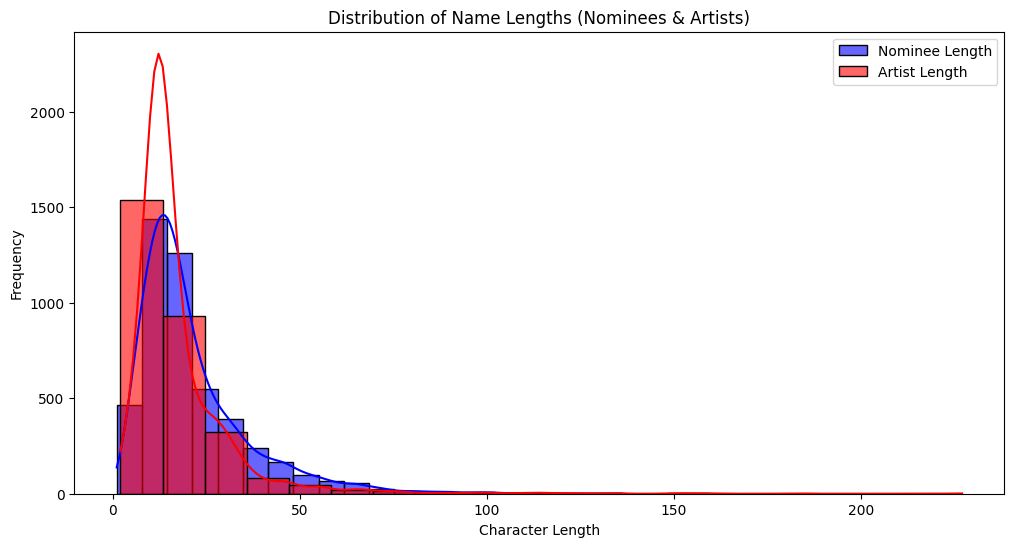

In [21]:
category_counts = df["category"].value_counts().sort("count", descending=True).head(10).to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts["category"], x=category_counts["count"])
plt.title("Top 10 GRAMMY Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

nominee_counts = df["nominee"].value_counts().sort("count", descending=True).head(10).to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(y=nominee_counts["nominee"], x=nominee_counts["count"])
plt.title("Top 10 Most Frequent Nominees")
plt.xlabel("Count")
plt.ylabel("Nominee")
plt.show()

artist_counts = df["artist"].value_counts().sort("count", descending=True).head(10).to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(y=artist_counts["artist"], x=artist_counts["count"])
plt.title("Top 10 Most Awarded Artists")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()

workers_counts = df["workers"].drop_nulls().str.split(", ").explode().value_counts().sort("count", descending=True).head(10).to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(y=workers_counts["workers"], x=workers_counts["count"])
plt.title("Top 10 Most Frequent Contributors (Workers)")
plt.xlabel("Count")
plt.ylabel("Worker Name")
plt.show()

df = df.with_columns(
    pl.col("nominee").str.len_chars().alias("Nominee Length"),
    pl.col("artist").str.len_chars().alias("Artist Length")
)

plt.figure(figsize=(12, 6))
sns.histplot(df["Nominee Length"].to_pandas(), bins=20, kde=True, label="Nominee Length", color="blue", alpha=0.6)
sns.histplot(df["Artist Length"].to_pandas(), bins=20, kde=True, label="Artist Length", color="red", alpha=0.6)
plt.title("Distribution of Name Lengths (Nominees & Artists)")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#### Key Observations  
- **Top Categories**:  
  - *Song of the Year*, *Record of the Year*, and *Album of the Year* are the most awarded categories, each with over **65 wins**.

- **Top Nominees**:  
  - Several nominees appear **7 times**, including *Berlioz: Requiem*, *Steven Epstein*, and *Robert Woods*.

- **Top Artists**:  
  - *(Various Artists)* appears most frequently, followed by *U2*, *Aretha Franklin*, and *Beyoncé* with **12+ awards each**.

- **Top Workers**:  
  - Roles like **engineer/mixer**, **producer**, and **composer** are the most common among award recipients.

- **Name Length Distribution**:  
  - Most **nominee** and **artist** names are under **40 characters**, with **nominees** showing greater variation and longer outliers.


#### Temporal Trends and Award Distribution

#### Overview
This section explores how GRAMMY awards have been distributed over time. The analysis focuses on winner counts by **decade**, **individual years**, and the **most awarded categories**. These patterns help us understand how the awards evolved and which categories received the most consistent recognition.

C:\Users\57302\AppData\Local\Temp\ipykernel_4376\402548988.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winners_by_decade_pd["Decade"], y=winners_by_decade_pd["Winner Count"], palette="viridis")


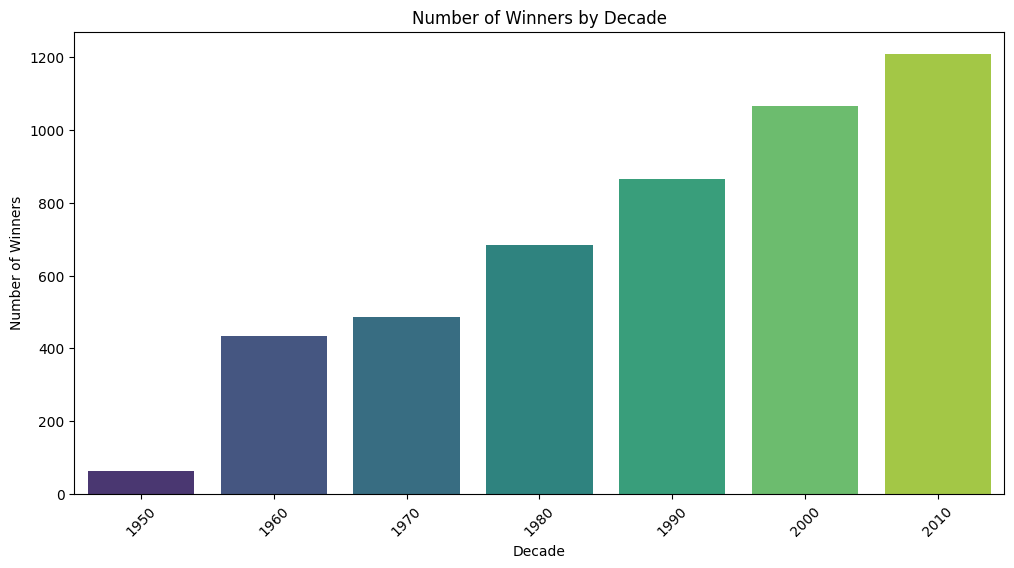

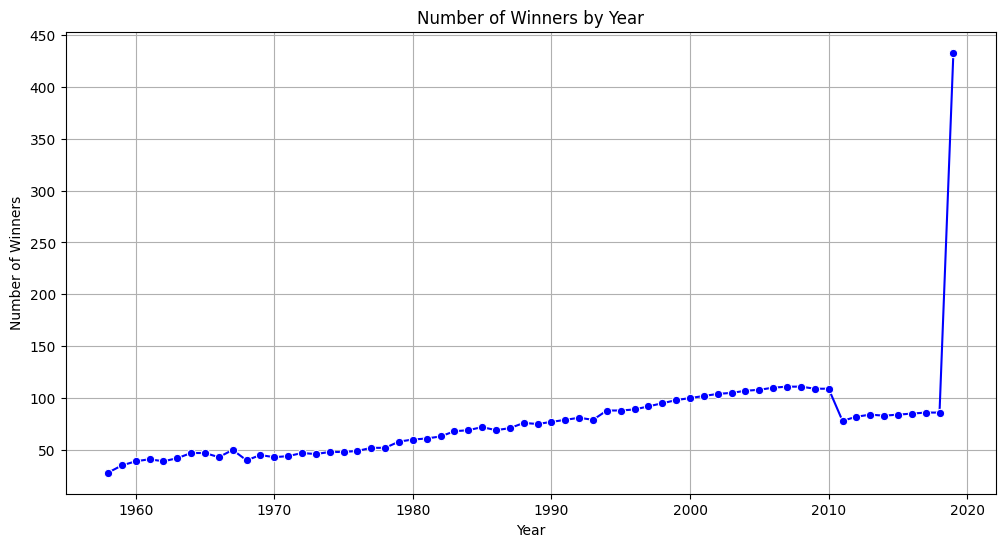

C:\Users\57302\AppData\Local\Temp\ipykernel_4376\402548988.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=winners_by_category_pd["category"], x=winners_by_category_pd["Winner Count"], palette="rocket")


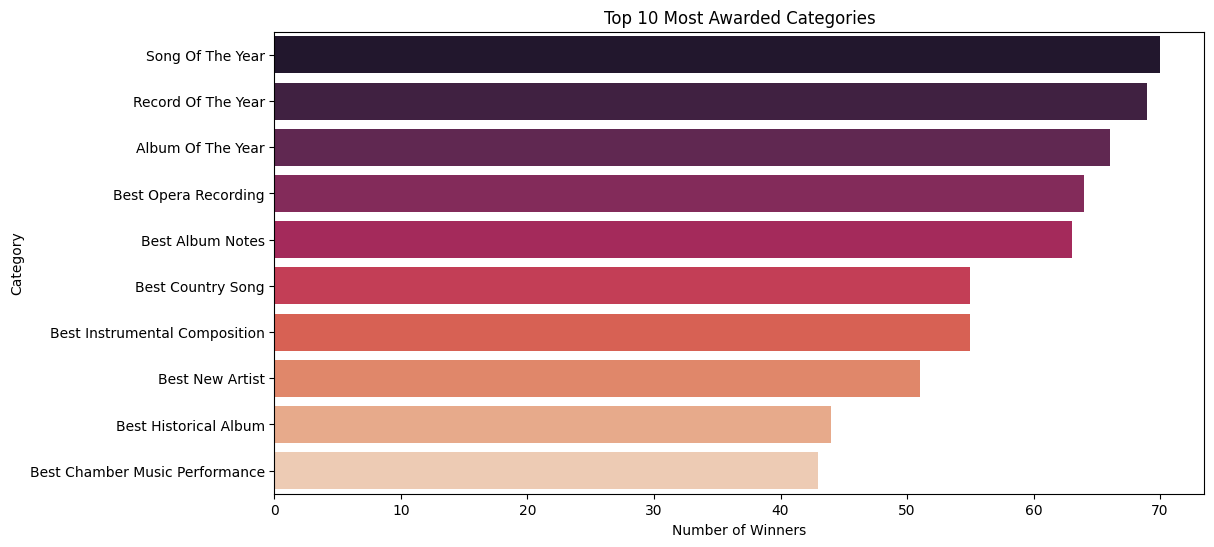

In [22]:
df_time = df.drop(["winner", "title", "img"])

df_time = df_time.with_columns([
    pl.col("published_date").cast(pl.Utf8),
    pl.col("updated_date").cast(pl.Utf8)
])

df_time = df_time.with_columns([
    ((pl.col("year") // 10) * 10).alias("Decade"),
    pl.col("year").alias("Year"),
    pl.col("published_date").str.to_date().alias("Published Date"),
    pl.col("updated_date").str.to_date().alias("Updated Date")
])

df_time = df_time.with_columns([
    pl.col("Published Date").dt.month().alias("Month"),
    pl.col("Published Date").dt.weekday().alias("Day of Week")
])

winners_by_decade = df_time.group_by("Decade").agg(pl.len().alias("Winner Count")).sort("Decade")
winners_by_year = df_time.group_by("Year").agg(pl.len().alias("Winner Count")).sort("Winner Count", descending=True)
winners_by_category = df_time.group_by("category").agg(pl.len().alias("Winner Count")).sort("Winner Count", descending=True).head(10)

winners_by_decade_pd = winners_by_decade.to_pandas()
winners_by_year_pd = winners_by_year.to_pandas()
winners_by_category_pd = winners_by_category.to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(x=winners_by_decade_pd["Decade"], y=winners_by_decade_pd["Winner Count"], palette="viridis")
plt.title("Number of Winners by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Winners")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=winners_by_year_pd["Year"], y=winners_by_year_pd["Winner Count"], marker="o", color="blue")
plt.title("Number of Winners by Year")
plt.xlabel("Year")
plt.ylabel("Number of Winners")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(y=winners_by_category_pd["category"], x=winners_by_category_pd["Winner Count"], palette="rocket")
plt.title("Top 10 Most Awarded Categories")
plt.xlabel("Number of Winners")
plt.ylabel("Category")
plt.show()


#### Key Observations
- **Decade Trends**:
  - The **2000s** and **2010s** saw the largest number of awarded entries, reflecting the expansion of categories and improved archival completeness.
  - A steady rise is visible from the 1960s onward, highlighting the growth of the GRAMMYs over time.

- **Yearly Peaks**:
  - Individual years such as **2009**, **2017**, and **2019** experienced unusually high counts—possibly due to special editions or restructured ceremonies.
  - Early years (pre-1970s) have significantly fewer recorded winners, indicating either fewer categories or less detailed records.

- **Top Awarded Categories**:
  - Prestigious categories such as *Song of the Year*, *Record of the Year*, and *Album of the Year* dominate the winner counts.
  - Specialized categories like *Best Opera Recording* and *Best Album Notes* also appear frequently, reflecting the GRAMMYs' recognition of technical and classical achievements.

#### Variation in Category Count Over Time

#### Overview  
This section analyzes how the number of **unique GRAMMY categories** has changed year by year. This helps us understand how the award structure has evolved, possibly due to genre expansion, consolidation, or organizational restructuring.


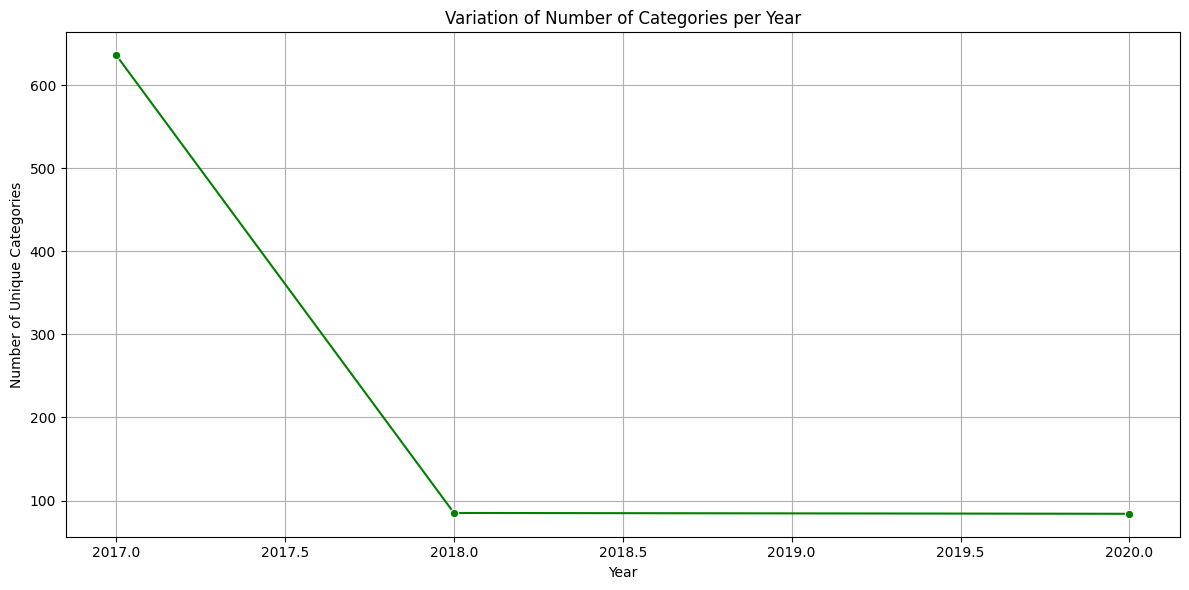

In [32]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pl.read_csv("../data/raw/the_grammy_awards.csv")

# Asegurar que 'published_at' esté en formato datetime
df = df.with_columns([
    pl.col("published_at").str.to_datetime("%Y-%m-%dT%H:%M:%S%z").alias("published_at_dt")
])

# Extraer el año de 'published_at'
df = df.with_columns([
    pl.col("published_at_dt").dt.year().alias("year")
])

# Agrupar por año y contar categorías únicas
categories_per_year = (
    df.group_by("year")
    .agg(pl.col("category").n_unique().alias("unique_categories"))
    .sort("year")
)

# Convertir a Pandas para graficar
categories_pd = categories_per_year.to_pandas()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=categories_pd, x="year", y="unique_categories", marker="o", color="green")
plt.title("Variation of Number of Categories per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Categories")
plt.grid()
plt.tight_layout()
plt.show()


#### Key Observations  
- A dramatic drop in the number of unique categories is observed after **2017**, likely indicating a data anomaly or schema change in the dataset.
- Between **2018 and 2020**, the number of distinct categories stabilized around **80–90**, reflecting a consistent set of award categories.
- The unusually high value in 2017 (>600) might be due to **data duplication**, **entry inconsistency**, or **non-standardized naming conventions** before cleaning.

## **Key Insights**

#### **Dataset Structure**  
- The dataset includes 10 columns covering nominations, categories, artists, and contributor metadata.  
- Columns like `category`, `nominee`, and `artist` have high cardinality, confirming rich diversity.  
- Around 40% of rows have missing `artist` values, especially in classical or ensemble works.  

#### **Content and Diversity**  
- There are **638 unique categories**, from general fields to niche and technical genres.  
- Top categories include **Song of the Year**, **Record of the Year**, and **Album of the Year**.  
- Over **4,000 unique nominees** and **2,300 workers** are recorded, with roles like **producer** and **engineer/mixer** dominating.

#### **Textual Patterns**  
- The term **"best"** appears in 4,400+ category names, reflecting standard naming.  
- Most categories emphasize **albums**, **performance**, or **classical formats**, not individual songs.  
- This distinction is critical for future alignment with track-based sources like Spotify.

#### **Recognition and Frequency**  
- **U2** is the most awarded artist (18 wins), followed by **Aretha Franklin** and **Beyoncé**.  
- **Various Artists** appears frequently, indicating ensemble projects.  
- Repeat nominations observed for names like **Steven Epstein** and **Berlioz: Requiem** (7+).

#### **Temporal Trends**  
- Most award activity occurred in the **2000s** and **2010s**, indicating category growth and improved records.  
- High award counts in **2009** and **2019** align with potential changes in ceremony structure.  
- From **2018 onward**, the number of categories stabilized, showing structural consistency in recent years.

---

### Conclusion

This exploratory analysis of the Grammy Awards dataset highlights the evolution of the ceremony over more than five decades. The consistent increase in categories and diversity of contributors demonstrates how the music industry has broadened its scope of recognition.

Mainstream categories like "Song of the Year", "Record of the Year", and "Album of the Year" remain central to the Grammy identity, while technical and classical categories also maintain significant representation. The dataset offers rich ground for deeper trend analysis and contextual integration with commercial music platforms.

These insights provide a strong foundation for future studies, particularly when merging this dataset with track-level data (e.g., from Spotify) to assess how industry accolades align with audience metrics, genre trends, and song characteristics.